In [2]:
#OpenStack Data is divided in three parts:Normal1,Normal2, Abnormal
#Let's start analyzing the columns and the trends

#2. Normal1- 10060 rows: columns, IDs and histograms, clusters 
# Columns were merged to form Log desc and Log desc2 --> data cleaning


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data=pd.read_csv('openstack_normal1_10060.csv')
data.head()

C:\Users\manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Log,Date,Time,ID,Type,Source,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Log Desc,Log Desc2
0,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:00 AM,25746,INFO,nova.osapi_compute.wsgi.server,10.11.10.1,GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/serve...,status:,200,len:,1893,time:,0.2477829,status: 200 len: 1893 time: 0.2477829,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
1,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:00 AM,25746,INFO,nova.osapi_compute.wsgi.server,10.11.10.1,GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/serve...,status:,200,len:,1893,time:,0.2577181,status: 200 len: 1893 time: 0.2577181,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
2,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:02 AM,25746,INFO,nova.osapi_compute.wsgi.server,10.11.10.1,GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/serve...,status:,200,len:,1893,time:,0.2731631,status: 200 len: 1893 time: 0.2731631,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
3,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:02 AM,25746,INFO,nova.osapi_compute.wsgi.server,10.11.10.1,GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/serve...,status:,200,len:,1893,time:,0.2580249,status: 200 len: 1893 time: 0.2580249,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
4,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:03 AM,25746,INFO,nova.osapi_compute.wsgi.server,10.11.10.1,GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/serve...,status:,200,len:,1893,time:,0.2727931,status: 200 len: 1893 time: 0.2727931,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...


In [4]:
data.drop(['Column13','Column14','Column15','Column16','Column17','Column18','Column19','Column20'],axis=1, inplace=True)

In [5]:
data.head()

,Log,Date,Time,ID,Type,Source,Log Desc,Log Desc2
0,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:00 AM,25746,INFO,nova.osapi_compute.wsgi.server,status: 200 len: 1893 time: 0.2477829,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
1,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:00 AM,25746,INFO,nova.osapi_compute.wsgi.server,status: 200 len: 1893 time: 0.2577181,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
2,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:02 AM,25746,INFO,nova.osapi_compute.wsgi.server,status: 200 len: 1893 time: 0.2731631,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
3,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:02 AM,25746,INFO,nova.osapi_compute.wsgi.server,status: 200 len: 1893 time: 0.2580249,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
4,nova-api.log.1.2017-05-16_13:53:08,5/16/2017,12:00:03 AM,25746,INFO,nova.osapi_compute.wsgi.server,status: 200 len: 1893 time: 0.2727931,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...


In [6]:
 
data['Type'].value_counts()


INFO        51431
WARNING       855
ERROR          25
CRITICAL        1
Name: Type, dtype: int64

In [7]:
data['Type'].value_counts().plot('bar')

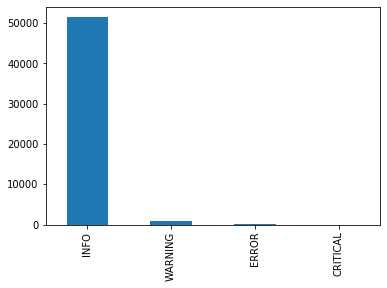

In [8]:
plt.show()

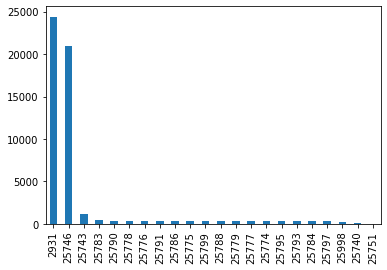

In [9]:
data['ID'].value_counts()
data['ID'].value_counts().plot('bar')
plt.show()

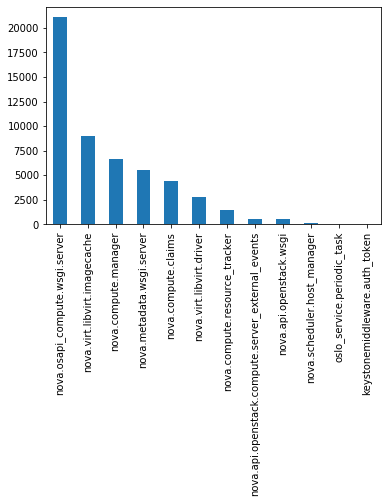

In [10]:
data['Source'].value_counts()
data['Source'].value_counts().plot('bar')
plt.show()

In [11]:
data['Date'].value_counts()

5/16/2017    52312
Name: Date, dtype: int64

In [12]:
#Time series analysis - Type vs day, ID vs day, Source vs day
data['Time'].value_counts()


3:19:45 AM     32
4:20:05 AM     21
2:51:16 AM     19
5:57:50 AM     19
2:48:30 AM     18
5:16:56 AM     18
12:07:11 AM    17
1:10:50 AM     17
4:13:28 AM     16
2:46:25 AM     16
4:31:50 AM     16
4:50:40 AM     16
2:33:46 AM     16
12:27:55 AM    15
12:03:17 AM    15
3:01:01 AM     15
3:09:20 AM     15
2:20:02 AM     15
3:51:05 AM     15
1:20:30 AM     15
1:37:05 AM     15
5:23:52 AM     15
3:13:31 AM     15
5:09:20 AM     14
1:35:01 AM     14
6:23:54 AM     14
6:11:28 AM     14
12:48:56 AM    14
4:29:05 AM     14
1:02:30 AM     14
               ..
3:15:56 AM      1
1:29:17 AM      1
1:59:42 AM      1
1:35:58 AM      1
4:47:58 AM      1
1:05:30 AM      1
4:10:49 AM      1
2:23:54 AM      1
5:06:37 AM      1
5:28:22 AM      1
4:24:39 AM      1
2:57:22 AM      1
5:51:51 AM      1
2:43:21 AM      1
5:06:55 AM      1
2:41:10 AM      1
5:45:40 AM      1
3:27:03 AM      1
3:46:41 AM      1
4:01:21 AM      1
2:04:07 AM      1
2:52:36 AM      1
2:30:19 AM      1
1:15:20 AM      1
3:35:33 AM

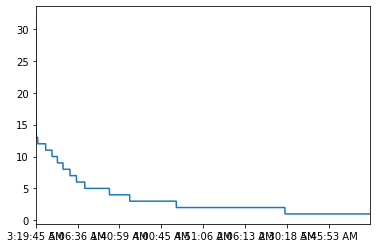

In [13]:
data['Time'].value_counts().plot()
plt.show()

C:\Users\manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


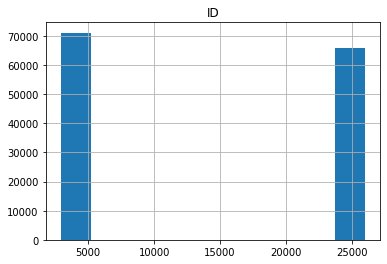

In [14]:
series = pd.read_csv('openstack_normal2_18047.csv', header=0, parse_dates=True, squeeze=True)
series.hist()
plt.show()

C:\Users\manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


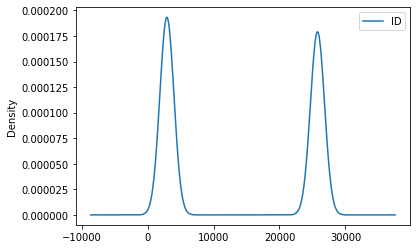

In [15]:
series = pd.read_csv('openstack_normal2_18047.csv', header=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
plt.show()

C:\Users\manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


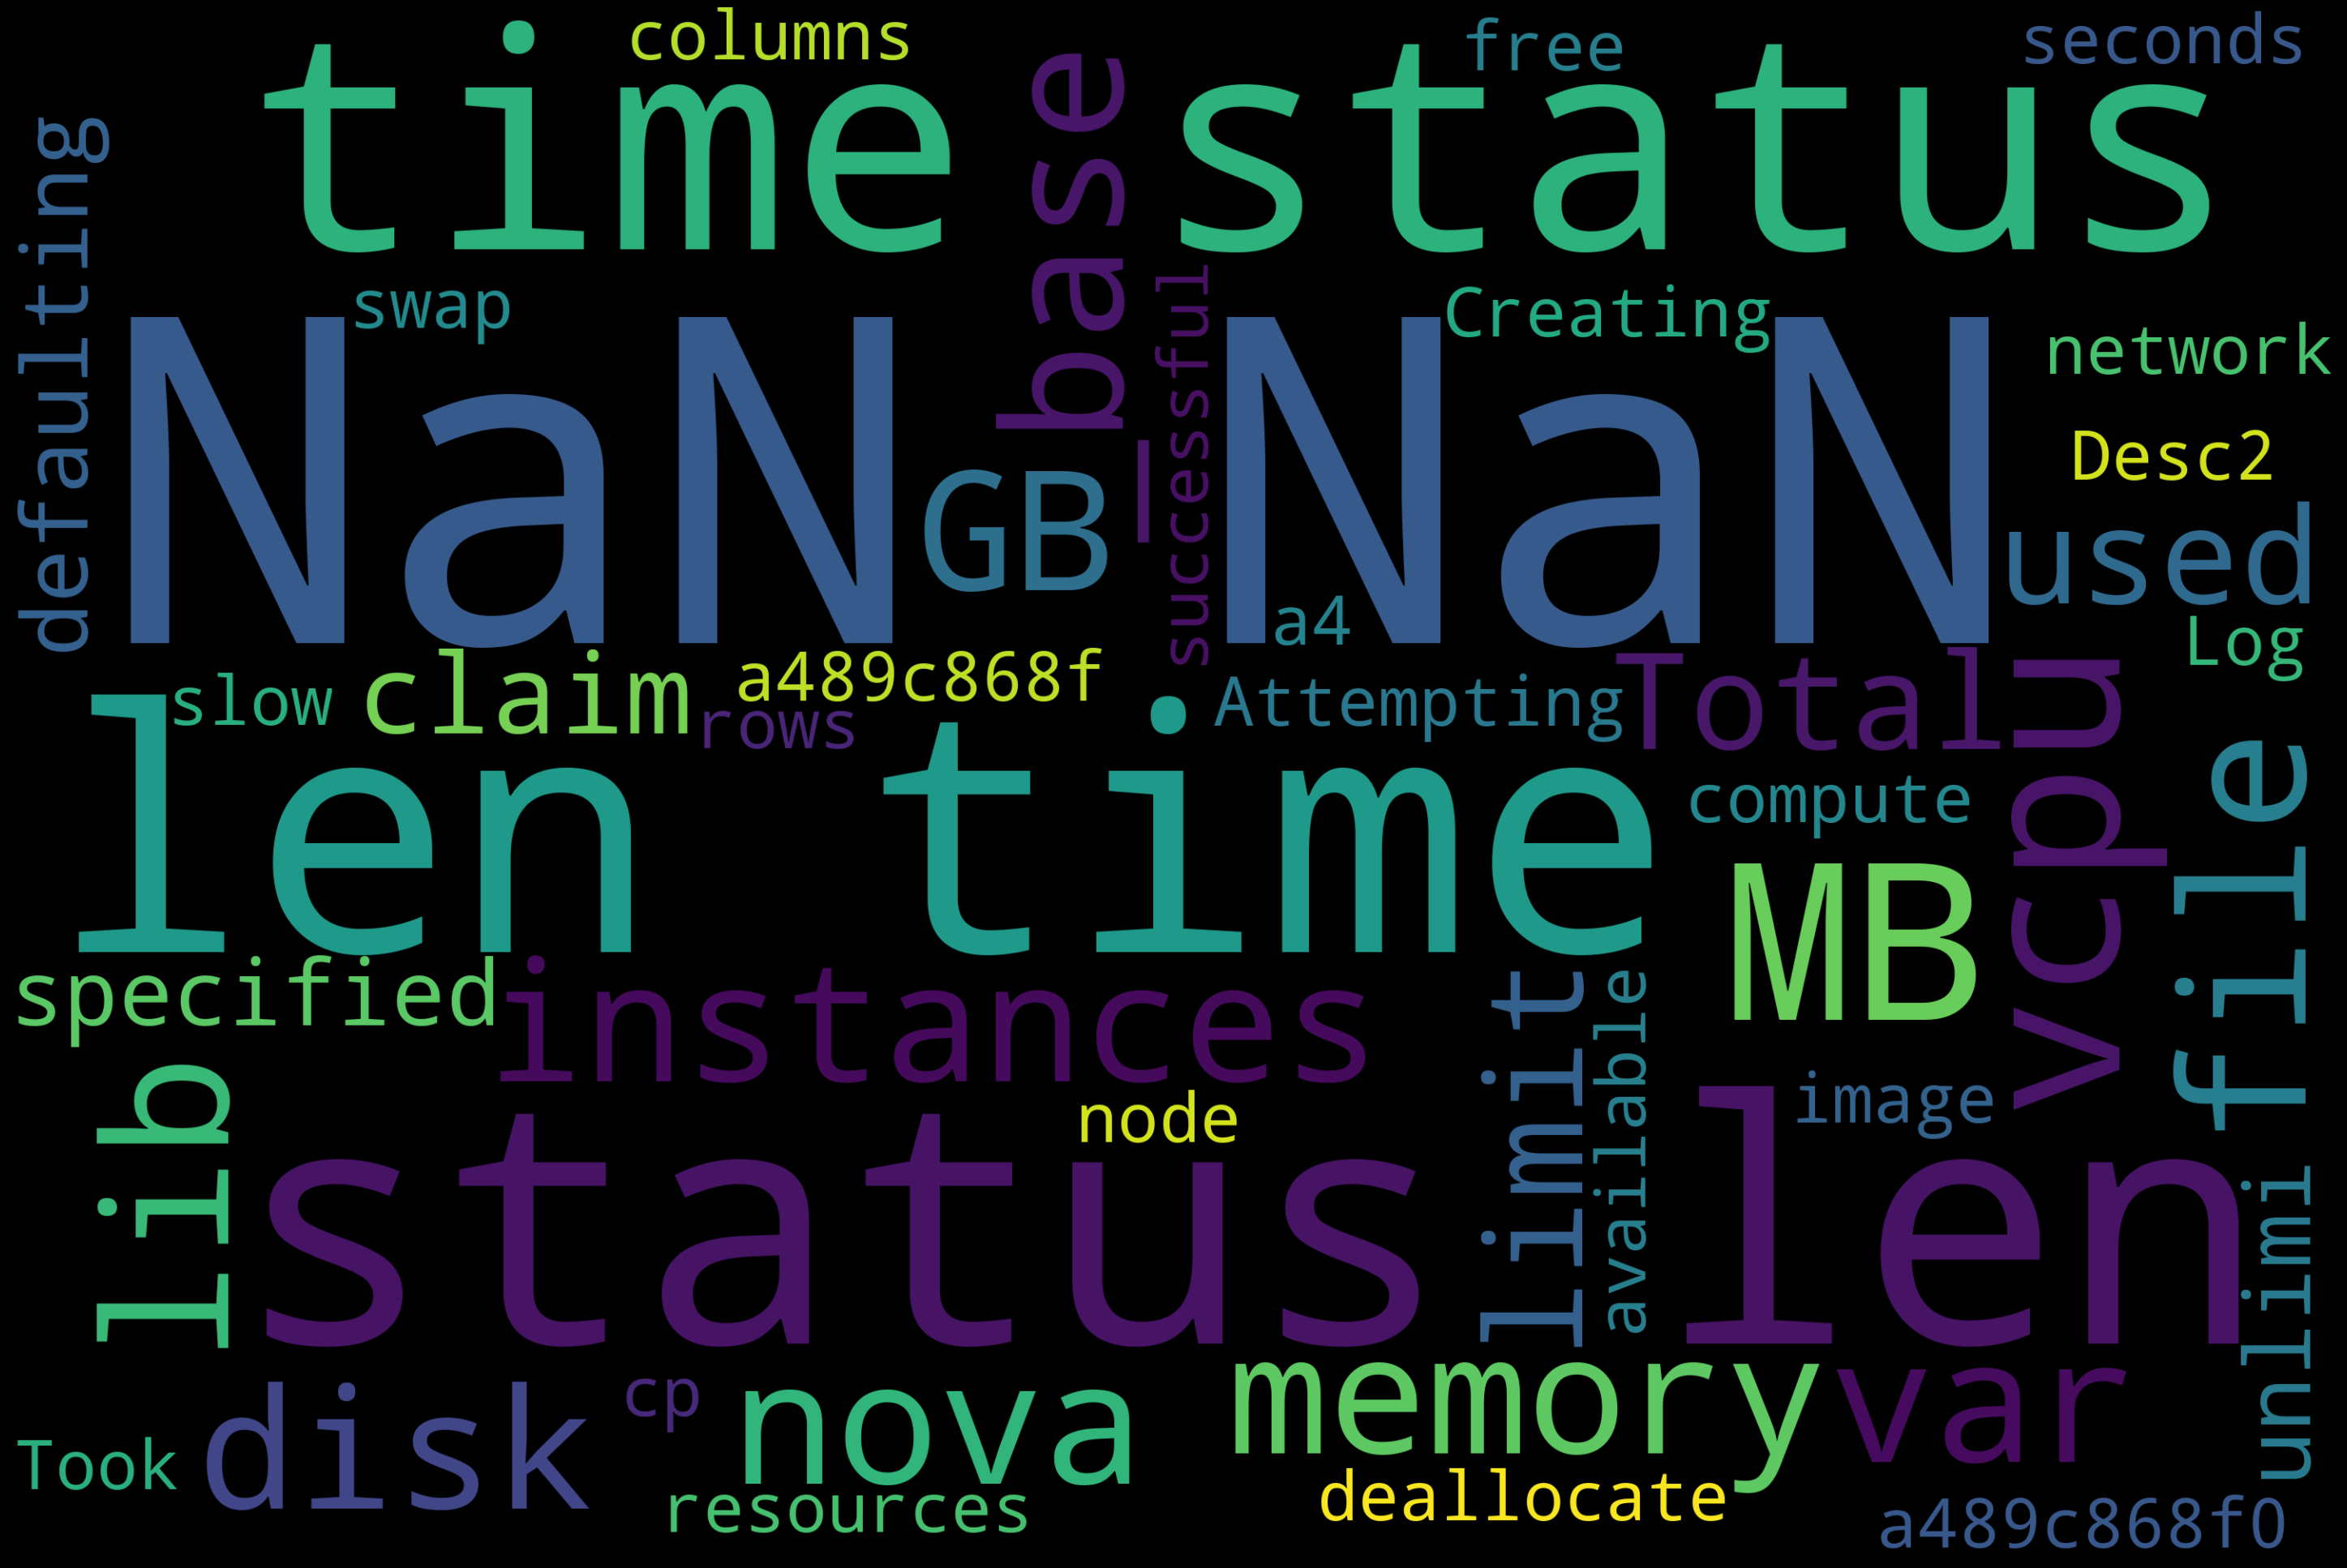

In [16]:
#Word cloud for Log desc2
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fields=['Log Desc2']
text2 = pd.read_csv('openstack_normal2_18047.csv', usecols=fields)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text2))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#TF IDF for Log desc, Log desc2